## TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("scores.csv")

In [3]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [4]:
# Create binary target variable 'Pass' (1 if Grades >= 50, else 0)
df['Pass'] = np.where(df['Grades'] >= 50, 1, 0)

# Drop 'Grades' column as it's now transformed into 'Pass'
df.drop(columns=['Grades'], inplace=True)

# Display updated dataset structure
df.head()


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Pass
0,0.95822,3.4,8.2,53.0,0
1,0.85566,3.2,5.9,55.0,0
2,0.68025,3.2,9.3,41.0,0
3,0.25936,3.2,8.2,47.0,0
4,0.60447,3.8,10.0,75.0,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


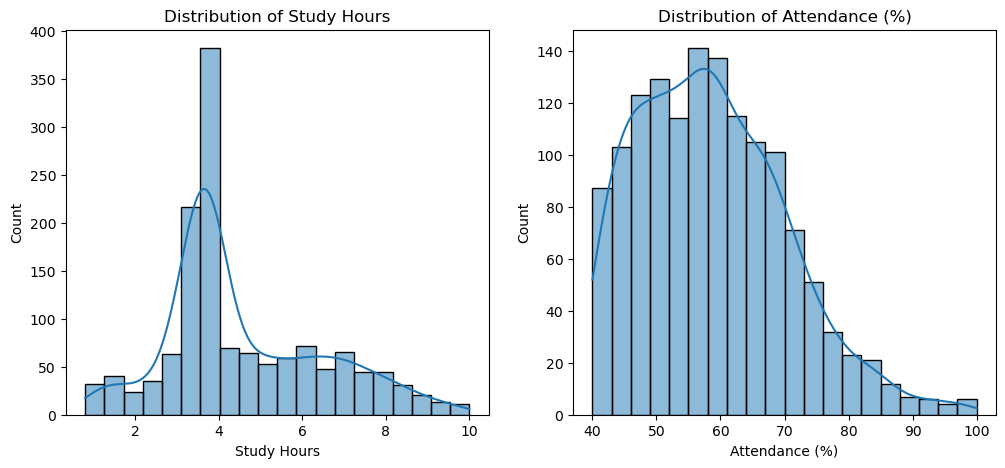

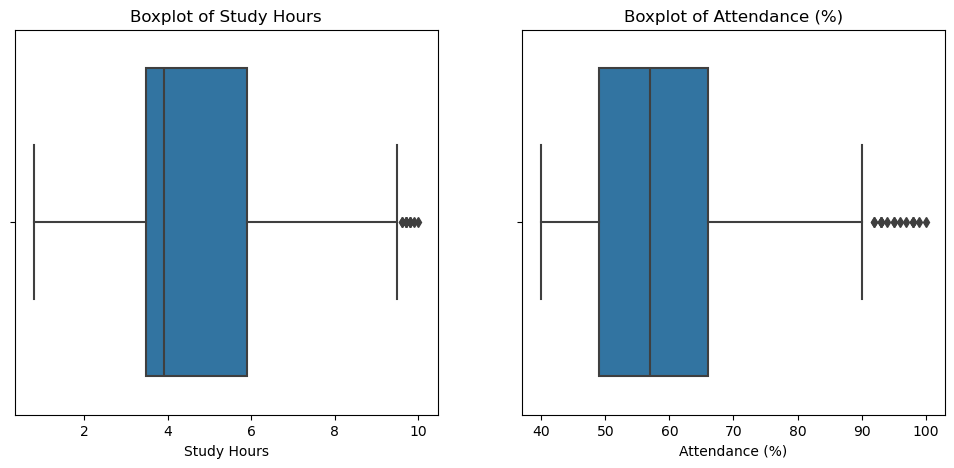

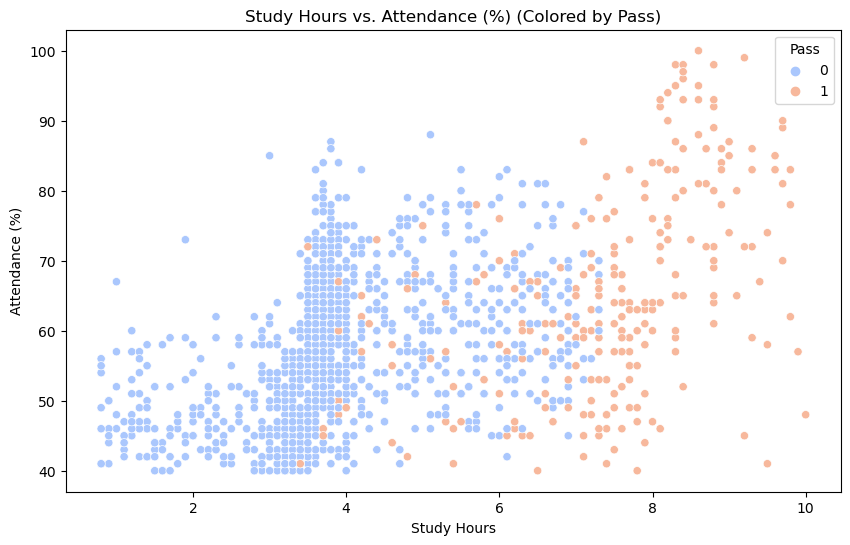

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Pass                   0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()

# Visualize distributions of Study Hours and Attendance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Study Hours'], bins=20, kde=True)
plt.title("Distribution of Study Hours")

plt.subplot(1, 2, 2)
sns.histplot(df['Attendance (%)'], bins=20, kde=True)
plt.title("Distribution of Attendance (%)")

plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Study Hours'])
plt.title("Boxplot of Study Hours")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Attendance (%)'])
plt.title("Boxplot of Attendance (%)")

plt.show()

# Scatter plot to visualize the relationship between Study Hours, Attendance, and Pass
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Study Hours'], y=df['Attendance (%)'], hue=df['Pass'], palette="coolwarm")
plt.title("Study Hours vs. Attendance (%) (Colored by Pass)")
plt.show()

# Display missing values
missing_values


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Selecting features and target variable
X = df[['Study Hours', 'Attendance (%)']]
y = df['Pass']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model training complete, now evaluating
model.score(X_test_scaled, y_test)


0.9064748201438849

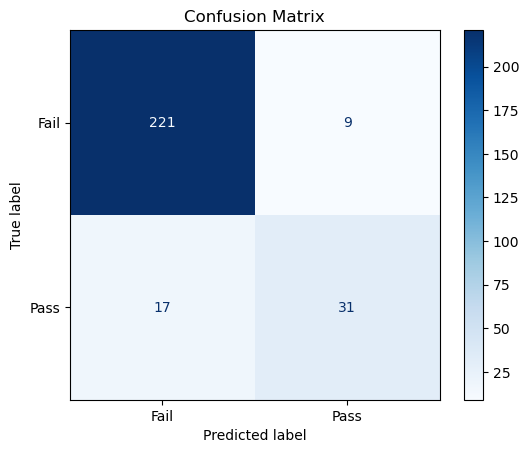

array([[221,   9],
       [ 17,  31]], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting on test data
y_pred = model.predict(X_test_scaled)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Returning confusion matrix values
cm


## Summary 

### Confusion Matrix Interpretation:
  True Negatives (221): Students correctly classified as failing.
  False Positives (9): Students incorrectly classified as passing.
  False Negatives (17): Students incorrectly classified as failing.
  True Positives (31): Students correctly classified as passing.

### Analysis
1. Study Hours & Attendance are strong predictors: Higher values in these features correlate with passing.
2. Low False Positive Rate: Only 9 students were wrongly predicted to pass.
3. Some False Negatives: 17 students who should have passed were misclassified.